## 2. wildfires_2000-2014

In [1]:
import geopandas

In [2]:
# import the shapefile with wildfires

fires2 = geopandas.read_file(r"Data_part-2_myTurn/wildfires_2000-2014.shp")

In [3]:
fires2

,Event_ID,irwinID,Incid_Name,Incid_Type,Map_ID,Map_Prog,Asmnt_Type,BurnBndAc,BurnBndLat,BurnBndLon,...,dNBR_offst,dNBR_stdDv,NoData_T,IncGreen_T,Low_T,Mod_T,High_T,Comment,ORIG_FID,geometry
0,AK6294916290120001227,None,PASTOLIAK RIVER,Wildfire,11509,MTBS,Initial (SS),12003,62.949,-162.901,...,-9999,-9999,9999,9999,200,100,-40,None,6330,POINT (-3614747.999 5671782.010)
1,AK6376715207620000623,None,FORAKER,Wildfire,11626,MTBS,Extended,18065,63.767,-152.076,...,-24,-9999,-970,-150,25,271,540,Edited shapefile of the AK fire histort perimeter,6331,POINT (-3062979.558 5351596.941)
2,AK6383315580420000625,None,TANGO CREEK,Wildfire,11014,MTBS,Extended,31347,63.833,-155.804,...,47,-9999,-970,-150,120,312,550,Edited AK fire history shapefile,6332,POINT (-3238946.623 5482656.169)
3,AK6383815072620000625,None,UPPER OTTER CREEK,Wildfire,11628,MTBS,Extended,4863,63.838,-150.726,...,-32,-9999,-970,-150,30,265,525,Edited shapefile of AK fire history perimeters,6333,POINT (-2994954.287 5316093.627)
4,AK6387215071520000624,None,OTTER CREEK,Wildfire,11627,MTBS,Extended,12071,63.872,-150.715,...,-32,-9999,-970,-150,30,273,540,Edited shapefile of AK fire history perimeter,6334,POINT (-2992677.783 5318507.336)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14382,WA4876712026320140805,DE8CF884-B2AC-42B1-8F15-2D31F021E07B,UPPER FALLS,Wildfire,22531,MTBS,Extended,8846,48.753,-120.252,...,-3,-9999,-970,-150,70,218,410,None,20712,POINT (-1784197.607 3090146.675)
14383,WI4661309124720140523,None,UNNAMED,Prescribed Fire,22460,MTBS,Initial (SS),2116,46.61,-91.235,...,-9999,-9999,9999,9999,300,-9999,-9999,None,20713,POINT (366130.408 2633604.819)
14384,WV3795208025920140508,None,UNNAMED,Unknown,21453,MTBS,Initial (SS),1069,37.956,-80.262,...,-9999,-9999,9999,9999,187,-89,-191,None,20714,POINT (1364076.672 1771034.108)
14385,WY4433410679520141108,6D08482F-03FA-47D9-8A5D-0A6FDA97AABE,WEST RANGE FIRE,Wildfire,22721,MTBS,Initial,1377,44.342,-106.8,...,41,-9999,-970,-150,50,195,380,None,20715,POINT (-856845.184 2421126.815)


In [4]:
fires2.shape

(14387, 24)

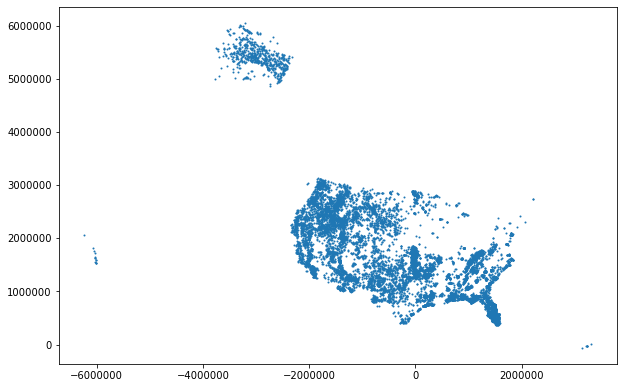

In [5]:
fires2.plot(markersize=1, figsize=(10,10))

In [6]:
# import the shapefile with all of the state boundaries

states = geopandas.read_file(r"Data/110m_cultural/ne_110m_admin_1_states_provinces.shp")

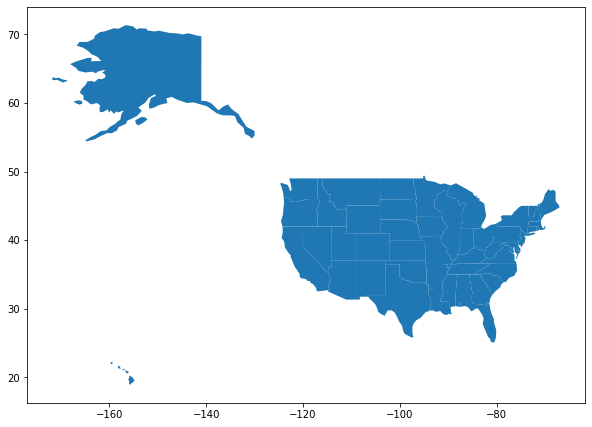

In [7]:
states.plot(markersize=1, figsize=(10,10))

In [8]:
states.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
fires2.crs

<Projected CRS: ESRI:102039>
Name: USA_Contiguous_Albers_Equal_Area_Conic_USGS_version
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [10]:
# reproject the fires2 shapefile to WGS84

fires2 = fires2.to_crs("epsg:4326")

In [11]:
state_fires2 = geopandas.sjoin(fires2,states[['name','geometry']].copy(),op='within')

In [12]:
counts_per_state = state_fires2.groupby('name').size()
counts_per_state.sort_values(axis=0, ascending=False)

name
Florida           3274
Texas              841
Kansas             794
California         729
Idaho              700
Oklahoma           606
Alaska             603
Arizona            502
Oregon             472
New Mexico         449
Nevada             438
South Carolina     400
Montana            400
Alabama            396
Mississippi        386
Utah               321
Arkansas           317
Louisiana          313
Georgia            280
Washington         260
Wyoming            246
Minnesota          214
Colorado           197
Kentucky           163
South Dakota       139
Missouri           137
North Carolina     132
Tennessee          130
Virginia            83
West Virginia       79
Nebraska            63
North Dakota        40
New Jersey          37
Maryland            32
Wisconsin           29
Indiana             28
Michigan            26
Hawaii              12
Pennsylvania        10
Iowa                 8
Illinois             7
New York             4
Delaware             2
Ohio  

In [13]:
states = states.merge(counts_per_state.reset_index(name='number_of_fires'))

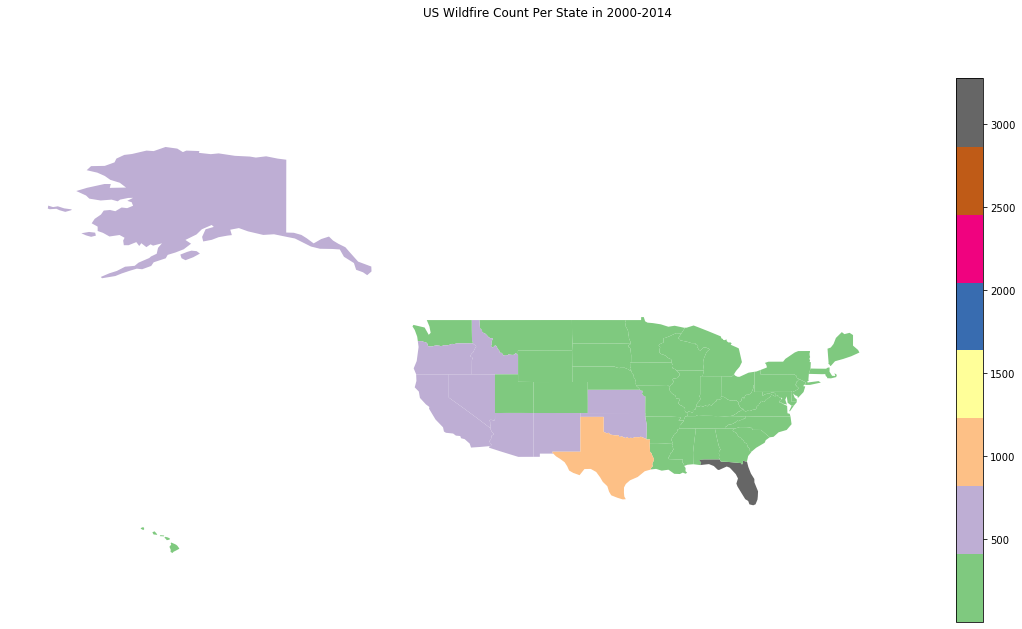

In [14]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, figsize=(20,10))
ax = states.plot(column='number_of_fires', cmap='Accent',
legend=True, ax=ax)
lims = plt.axis('equal')
f.suptitle('US Wildfire Count Per State in 2000-2014')
ax.set_axis_off()
plt.show()

Explaination: 
    
The choropleth map that shows the total wildfires in the US from 2000-2014. the largest number of fires in Florida, Texas, and Kansas. California and Idaho have reduced data, ranking fourth and fifth. Data for Hawaii, Maine, and Indiana have increased. Massachusetts has the least number of fires during this period. This is different from the 1985-1999 data.
For plotting the map, I use similar steps with the map of wildfire in 1985-1999.
first, I uploaded all the data on wildfires in each state of the United States from 2000-2014. Save them in Jupyter's folder. And start with importing the module ‘geopandas’. Then, I import the shapefile with all of the state boundaries and using the same procedure for data of ‘wildfires in 2000-2014’, which is defined as ‘fires2’. Now I overlay the data of  ‘wildfires in 2000-2014’ with state geometries using of a spatial join using the sjoin method. For make sure that the data uses the same map projection. I verify it as ‘fires2.crs’ and ‘states.crs’. then make both have same CRS. Next, I count the total wildfires per state and map the results. The list is a pandas series object showing the state name and total count. Sort from largest to smallest. At last, with matplotlib, plot a choropleth map by adding title, legend, size, and dropping the x-axis and y-axis to fine-tune.
